In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

In [ ]:
df = pd.read_csv('/content/updated_pollution_dataset.csv')

print(df.isnull().sum())
print(df.shape)
df.head(15)

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64
(5000, 10)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Air Quality'], drop_first=False)

print(df_encoded.shape)
df_encoded.head(15)

(5000, 13)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Good,Air Quality_Hazardous,Air Quality_Moderate,Air Quality_Poor
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,False,False,True,False
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,False,False,True,False
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,False,False,True,False
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,True,False,False,False
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,True,False,False,False
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,False,True,False,False
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,False,False,False,True
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,False,False,True,False
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,False,False,False,True
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,False,False,False,True


In [ ]:
def prepare_data(df, target_columns):
    columns_to_drop = target_columns + ['Proximity_to_Industrial_Areas', 'Population_Density']
    X = df.drop(columns=columns_to_drop)
    y = df[target_columns]
    y_svm = np.argmax(y.values, axis=1)  # Convert one-hot encoding to class labels
    return X, y_svm

def split_data(X, y_svm, test_size=0.2, random_state=42):
    return train_test_split(X, y_svm, test_size=test_size, random_state=random_state)

def train_svm(X_train, y_train):
    svm = SVC(decision_function_shape='ovr')

    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    }

    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_

def save_model(model, filename="svm_model.pkl"):
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")


target_columns = ['Air Quality_Good', 'Air Quality_Moderate', 'Air Quality_Poor', 'Air Quality_Hazardous']
X, y_svm = prepare_data(df_encoded, target_columns)

X_train, X_test, y_train_svm, y_test_svm = split_data(X, y_svm)

best_model, best_params = train_svm(X_train, y_train_svm)
print(f"Best Parameters: {best_params}")

save_model(best_model)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Model saved as svm_model.pkl


Accuracy: 0.9320
              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       409
    Moderate       0.93      0.95      0.94       294
        Poor       0.83      0.83      0.83       186
   Hazardous       0.88      0.81      0.85       111

    accuracy                           0.93      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000



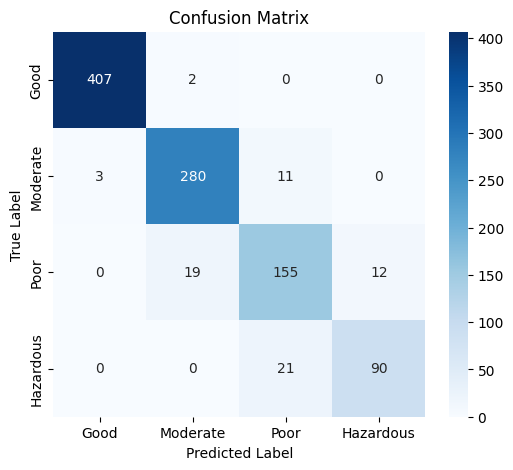

In [ ]:
def evaluate_model(model, X_test, y_test, class_labels):
    y_pred = model.predict(X_test)

    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred, target_names=class_labels))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

class_labels = ["Good", "Moderate", "Poor", "Hazardous"]
evaluate_model(best_model, X_test, y_test_svm, class_labels)